In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gmaps

from config import gkey

gmaps.configure(api_key=gkey)

In [2]:
census = pd.read_pickle("Intermediate Data/census_with_household.pkl")
census.head()

,Population_2011,Median Age_2011,Household Income_2011,Per Capita Income_2011,Population_2016,Median Age_2016,Household Income_2016,Per Capita Income_2016,PC Income Increase/Decrease,PC % Income Increase/Decrease,HH Income Increase/Decrease,HH % Income Increase/Decrease
Zipcodes,,,,,,,,,,,,
78610,22052.0,35.9,82702.0,31356.0,30452.0,34.7,75453.0,30388.0,-968.0,-3.087128,-7249.0,-8.765205
78613,63901.0,33.9,81819.0,33101.0,75279.0,34.6,91033.0,35957.0,2856.0,8.628138,9214.0,11.261443
78617,18572.0,28.8,44334.0,14975.0,26126.0,30.0,47551.0,16737.0,1762.0,11.766277,3217.0,7.256282
78641,43655.0,32.2,67683.0,27738.0,55933.0,34.8,83526.0,33138.0,5400.0,19.467878,15843.0,23.407650
78652,4256.0,39.1,79107.0,37908.0,4919.0,40.1,78594.0,34131.0,-3777.0,-9.963596,-513.0,-0.648489


In [3]:
#drop outlier
census_drop = census.drop(78712)
census_drop.head()

,Population_2011,Median Age_2011,Household Income_2011,Per Capita Income_2011,Population_2016,Median Age_2016,Household Income_2016,Per Capita Income_2016,PC Income Increase/Decrease,PC % Income Increase/Decrease,HH Income Increase/Decrease,HH % Income Increase/Decrease
Zipcodes,,,,,,,,,,,,
78610,22052.0,35.9,82702.0,31356.0,30452.0,34.7,75453.0,30388.0,-968.0,-3.087128,-7249.0,-8.765205
78613,63901.0,33.9,81819.0,33101.0,75279.0,34.6,91033.0,35957.0,2856.0,8.628138,9214.0,11.261443
78617,18572.0,28.8,44334.0,14975.0,26126.0,30.0,47551.0,16737.0,1762.0,11.766277,3217.0,7.256282
78641,43655.0,32.2,67683.0,27738.0,55933.0,34.8,83526.0,33138.0,5400.0,19.467878,15843.0,23.407650
78652,4256.0,39.1,79107.0,37908.0,4919.0,40.1,78594.0,34131.0,-3777.0,-9.963596,-513.0,-0.648489


In [4]:
crime_2011 = pd.read_pickle("Intermediate Data/count_zipcode_type_2011.pkl")
crime_2011["Zip Code"] = crime_2011["Zip Code"].map("{:.0f}".format)
crime_2011.head()


,Zip Code,Highest Offense Description,Number of Occurances
0,78610,APPLIC TO REVOKE PROBATION,2
1,78610,BURGLARY OF VEHICLE,1
2,78610,CUSTODY ARREST TRAFFIC WARR,2
3,78610,HARASSMENT,1
4,78610,THEFT,1


In [5]:
crime_2016 = pd.read_pickle("Intermediate Data/count_zipcode_type_2016.pkl")
crime_2016["Zip Code"] = crime_2016["Zip Code"].map("{:.0f}".format)
crime_2016.head()

,Zip Code,Highest Offense Description,Number of Occurances
0,78610,DAMAGE CITY PROP,1
1,78610,DWI .15 BAC OR ABOVE,1
2,78610,FAILURE TO IDENTIFY,1
3,78610,TERRORISTIC THREAT,1
4,78613,AGG ROBBERY/DEADLY WEAPON,1


In [7]:
crime_2011_zipcodes = crime_2011["Zip Code"].unique()
len(crime_2011_zipcodes)

53

In [8]:
crime_2016_zipcodes = crime_2016["Zip Code"].unique()
len(crime_2016_zipcodes)

52

In [9]:
zipcode_difference = list(set(crime_2011_zipcodes)-set(crime_2016_zipcodes))
zipcode_difference

['78640']

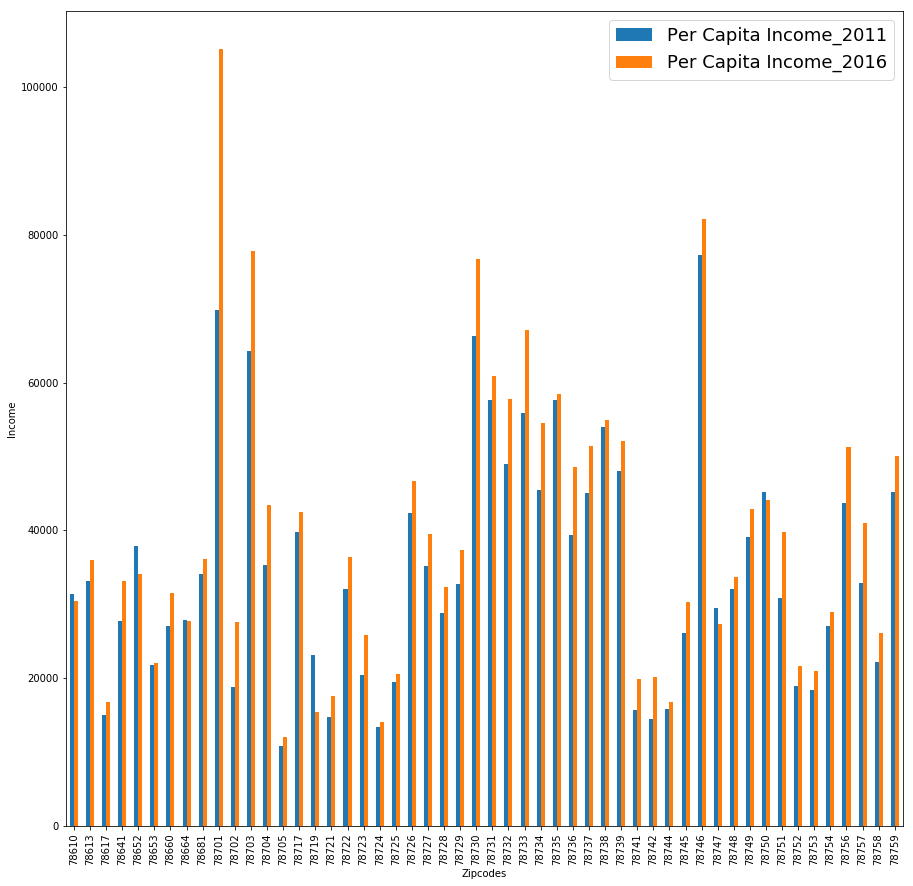

In [8]:
income_by_year = census_drop.plot(kind='bar',y=["Per Capita Income_2011","Per Capita Income_2016"], figsize=(15,15), fontsize=10)
income_by_year.set_ylabel("Income")
income_by_year.legend(prop={'size': 18})
plt.savefig("Images/incomebyyear.png")

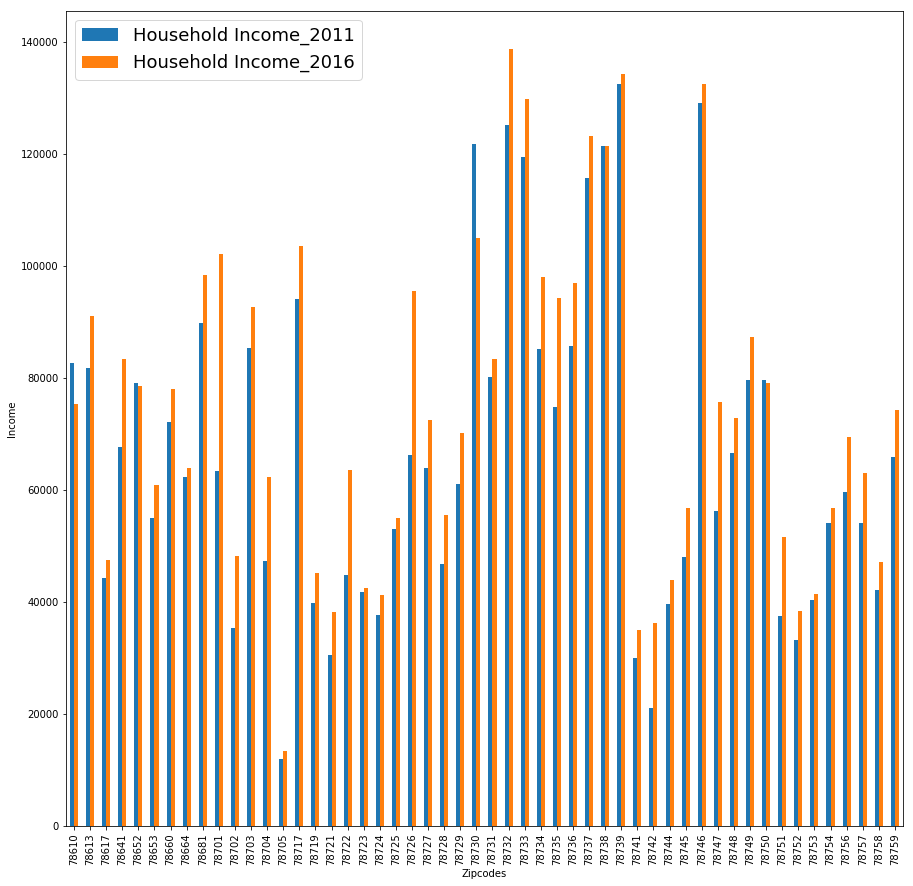

In [9]:
hh_income_by_year = census_drop.plot(kind='bar',y=["Household Income_2011","Household Income_2016"], figsize=(15,15), fontsize=10)
hh_income_by_year.set_ylabel("Income")
hh_income_by_year.legend(prop={'size': 18})
plt.savefig("Images/HHincomebyyear.png")

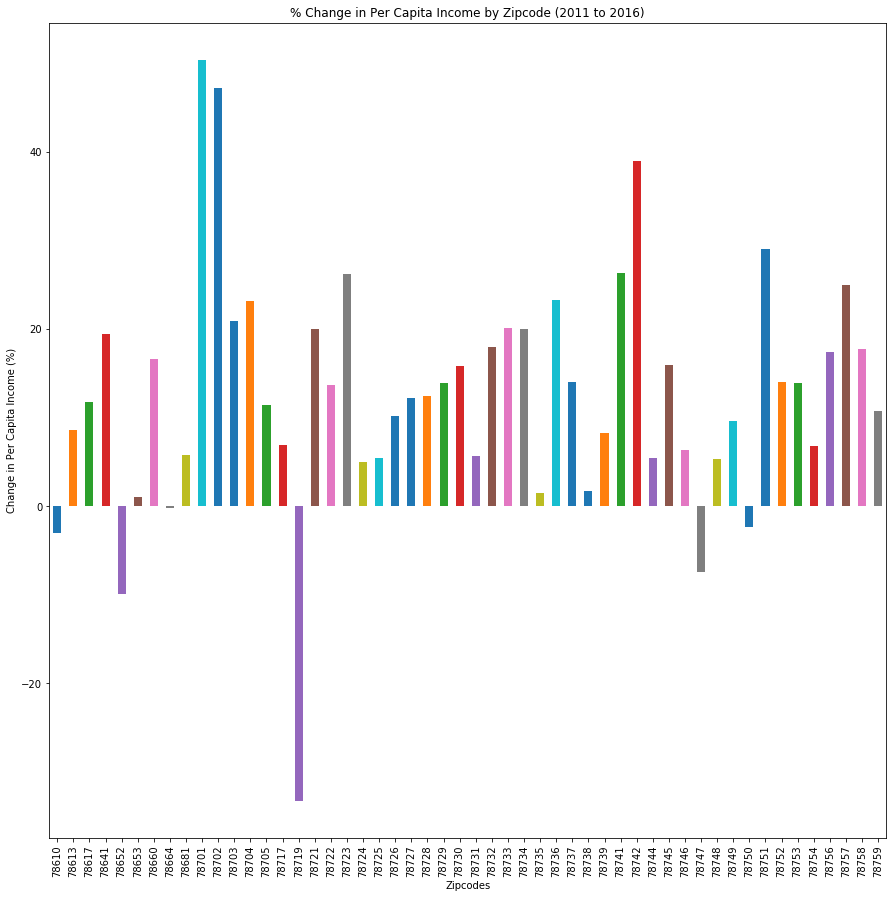

In [10]:
compare_pc_income_percent = census_drop.plot(kind="bar", y="PC % Income Increase/Decrease", figsize=(15,15), fontsize=10, legend=False, title="% Change in Per Capita Income by Zipcode (2011 to 2016)")
compare_pc_income_percent.set_ylabel("Change in Per Capita Income (%)")
compare_pc_income_percent
plt.savefig("Images/PCIncomeChangePercent.png")

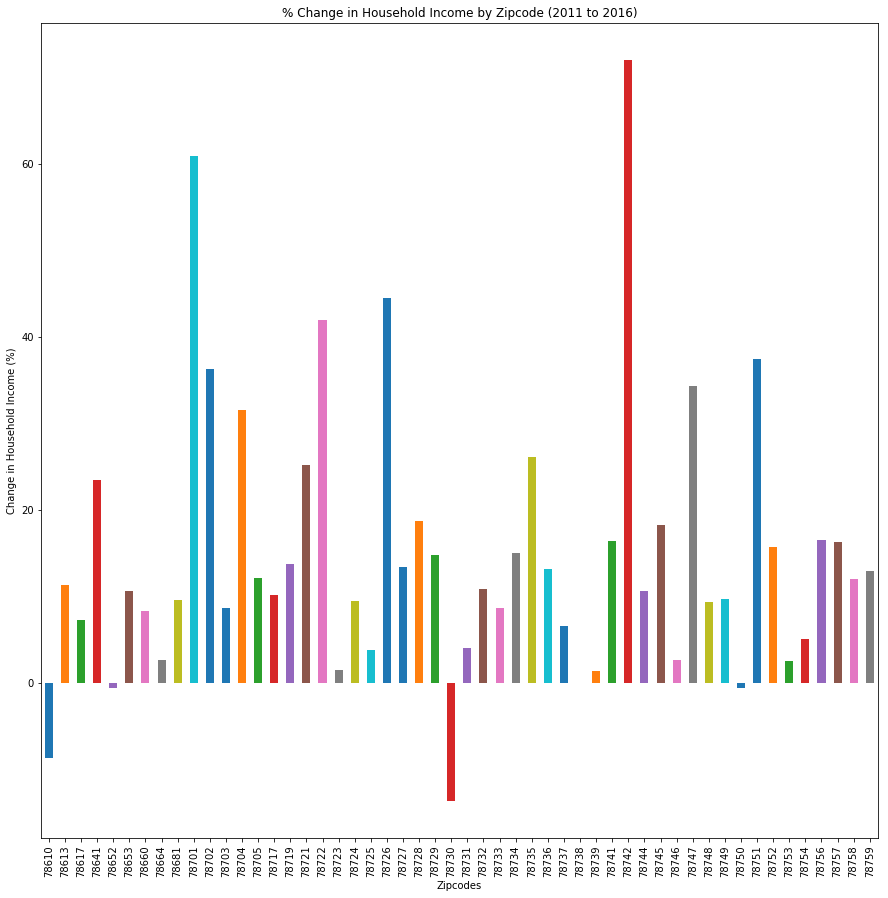

In [12]:
compare_hh_income_percent = census_drop.plot(kind="bar", y="HH % Income Increase/Decrease", figsize=(15,15), fontsize=10, legend=False, title="% Change in Household Income by Zipcode (2011 to 2016)")
compare_hh_income_percent.set_ylabel("Change in Household Income (%)")
compare_hh_income_percent
plt.savefig("Images/HHIncomeChangePercent.png")

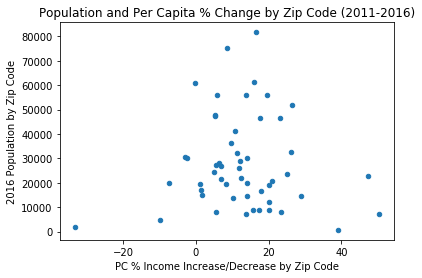

In [13]:
# no significant correlation between Population and PC % Income Increase/Decrease
census_drop.plot(kind="scatter", x="PC % Income Increase/Decrease", y="Population_2016")
plt.title("Population and Per Capita % Change by Zip Code (2011-2016)")
plt.ylabel("2016 Population by Zip Code")
plt.xlabel("PC % Income Increase/Decrease by Zip Code")
plt.savefig("Images/PCIncomeChangePopulation.png")
plt.show()

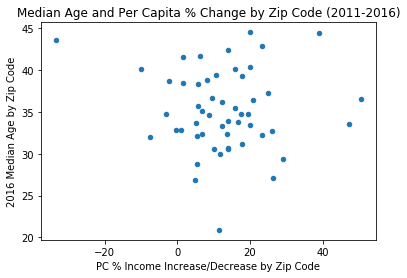

In [14]:
# no significant correlation between Median Age and PC % Income Increase/Decrease
census_drop.plot(kind="scatter", x="PC % Income Increase/Decrease", y="Median Age_2016")
plt.title("Median Age and Per Capita % Change by Zip Code (2011-2016)")
plt.ylabel("2016 Median Age by Zip Code")
plt.xlabel("PC % Income Increase/Decrease by Zip Code")
plt.savefig("Images/PCIncomeChangeAge.png")
plt.show()

In [15]:
#merge crime dataframes
crime_2011_groupby = crime_2011.groupby("Zip Code")
crime_2011_sum = crime_2011_groupby["Number of Occurances"].sum()
crime_2016_groupby = crime_2016.groupby("Zip Code")
crime_2016_sum = crime_2016_groupby["Number of Occurances"].sum()
crime = pd.DataFrame({
    "Number of Offenses 2011": crime_2011_sum,
    "Number of Offenses 2016": crime_2016_sum,
    "Difference (2011-2016)": crime_2011_sum - crime_2016_sum
})


crime.index.name = "Zipcode"


crime.head()

,Number of Offenses 2011,Number of Offenses 2016,Difference (2011-2016)
Zipcode,,,
78610,7,4.0,3.0
78613,439,505.0,-66.0
78617,1093,941.0,152.0
78640,1,NaN,NaN
78652,33,45.0,-12.0


In [16]:

crime_narrowed = pd.read_pickle("Intermediate Data/crime_2011_2016.pkl")
crime_drop = pd.read_pickle("Intermediate Data/filtered_crime_df.pkl")

crime_narrowed_2011 = crime_drop.loc[crime_narrowed["Year"] == 2011]
crime_count_2011 = crime_narrowed_2011["Zip Code"].value_counts()

crime_narrowed_2016 = crime_drop.loc[crime_narrowed["Year"] == 2016]
crime_count_2016 = crime_narrowed_2016["Zip Code"].value_counts()


In [17]:
zipcode_2011 = crime_narrowed_2011["Zip Code"].unique()
zipcode_2016 = crime_narrowed_2016["Zip Code"].unique()
print(len(zipcode_2011))
print(len(zipcode_2016))
zipcode_difference = list(set(zipcode_2011)-set(zipcode_2016))
print(zipcode_difference)

53
52
['78640']


In [19]:
census = pd.read_pickle("Intermediate Data/census_with_household.pkl")


In [20]:
crime_narrowed_2011_drop = crime_narrowed_2011.drop(1394611)
crime_count_2011_drop = crime_narrowed_2011_drop["Zip Code"].value_counts()
df_crime_count = pd.DataFrame({
    "2011": crime_count_2011_drop,
    "2016": crime_count_2016,
    "Change": crime_count_2016 - crime_count_2011_drop,
})

df_crime_count.index.name="Zipcode"


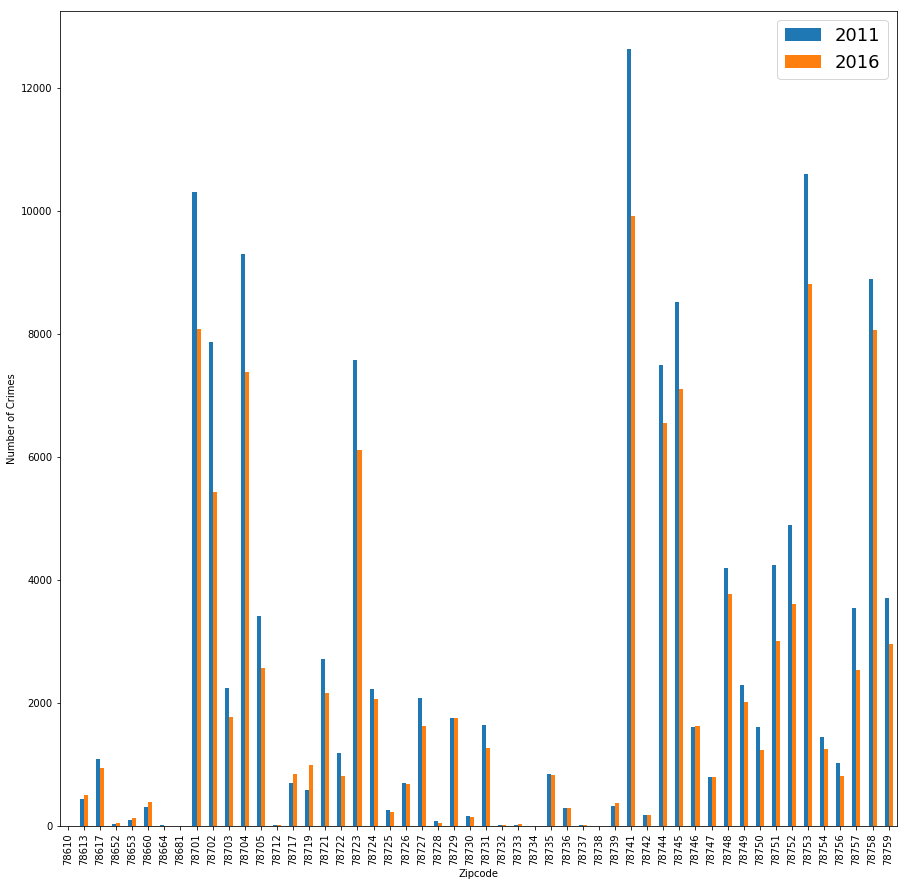

In [21]:
crime_by_year = df_crime_count.plot(kind='bar',y=["2011","2016"], figsize=(15,15), fontsize=10)
crime_by_year.set_ylabel("Number of Crimes")
crime_by_year.legend(prop={'size': 18})
plt.savefig("Images/CrimeCount.png")

In [22]:
df_crime_count.index = df_crime_count.index.astype(int)
crime_census = census
crime_census["Crime Count 2011"] = df_crime_count["2011"]
crime_census["Crime Count 2016"] = df_crime_count["2016"]
crime_census["Change in Crime"] = df_crime_count["Change"]
crime_census["% Change in Crime"] = df_crime_count["Change"]/df_crime_count["2011"]*100
crime_census["Population Change"] = crime_census["Population_2016"] - crime_census["Population_2011"]
crime_census["% Population Change"] = crime_census["Population Change"]/crime_census["Population_2011"]*100
crime_census.head()


,Population_2011,Median Age_2011,Household Income_2011,Per Capita Income_2011,Population_2016,Median Age_2016,Household Income_2016,Per Capita Income_2016,PC Income Increase/Decrease,PC % Income Increase/Decrease,HH Income Increase/Decrease,HH % Income Increase/Decrease,Crime Count 2011,Crime Count 2016,Change in Crime,% Change in Crime,Population Change,% Population Change
Zipcodes,,,,,,,,,,,,,,,,,,
78610,22052.0,35.9,82702.0,31356.0,30452.0,34.7,75453.0,30388.0,-968.0,-3.087128,-7249.0,-8.765205,7.0,4.0,-3.0,-42.857143,8400.0,38.091783
78613,63901.0,33.9,81819.0,33101.0,75279.0,34.6,91033.0,35957.0,2856.0,8.628138,9214.0,11.261443,439.0,505.0,66.0,15.034169,11378.0,17.805668
78617,18572.0,28.8,44334.0,14975.0,26126.0,30.0,47551.0,16737.0,1762.0,11.766277,3217.0,7.256282,1093.0,941.0,-152.0,-13.906679,7554.0,40.674133
78641,43655.0,32.2,67683.0,27738.0,55933.0,34.8,83526.0,33138.0,5400.0,19.467878,15843.0,23.407650,NaN,NaN,NaN,NaN,12278.0,28.125072
78652,4256.0,39.1,79107.0,37908.0,4919.0,40.1,78594.0,34131.0,-3777.0,-9.963596,-513.0,-0.648489,33.0,45.0,12.0,36.363636,663.0,15.578008


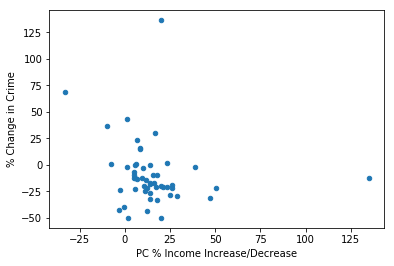

In [23]:
crime_census.plot(kind='scatter', x='PC % Income Increase/Decrease', y="% Change in Crime")
# plt.scatter(x=crime_census['PC % Income Increase/Decrease'], y=crime_census["% Change in Crime"],s=crime_census["% Population Change"]*5)

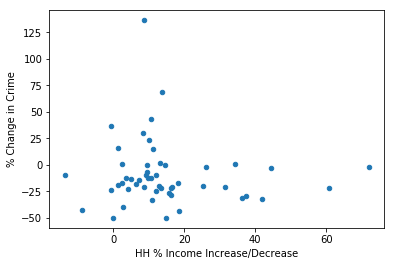

In [24]:
crime_census.plot(kind='scatter', x='HH % Income Increase/Decrease', y="% Change in Crime")

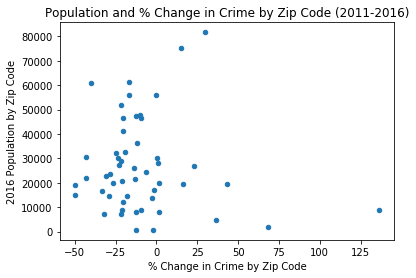

In [25]:
crime_census.plot(kind="scatter", x="% Change in Crime", y="Population_2016")
plt.title("Population and % Change in Crime by Zip Code (2011-2016)")
plt.ylabel("2016 Population by Zip Code")
plt.xlabel("% Change in Crime by Zip Code")
plt.savefig("Images/CrimePopulation.png")
plt.show()


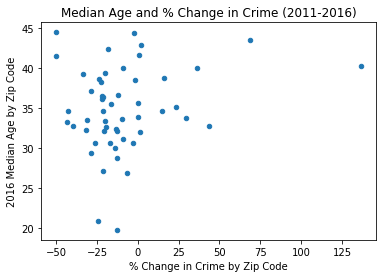

In [26]:
crime_census.plot(kind="scatter", x="% Change in Crime", y="Median Age_2016")
plt.title("Median Age and % Change in Crime (2011-2016)")
plt.ylabel("2016 Median Age by Zip Code")
plt.xlabel("% Change in Crime by Zip Code")
plt.savefig("Images/CrimeAge.png")
plt.show()

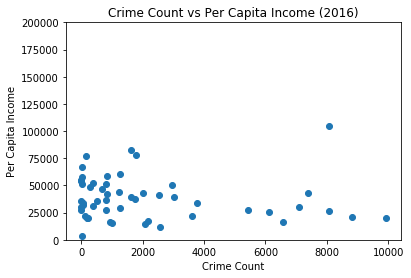

In [27]:
plt.scatter(x=crime_census["Crime Count 2016"],y=crime_census["Per Capita Income_2016"])
plt.ylim(0,200000)
plt.title("Crime Count vs Per Capita Income (2016)")
plt.ylabel("Per Capita Income")
plt.xlabel("Crime Count")
plt.savefig("Images/crime_pcincome.png")
plt.show()


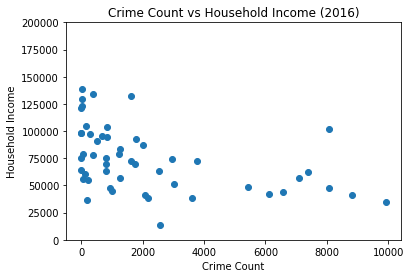

In [28]:
plt.scatter(x=crime_census["Crime Count 2016"],y=crime_census["Household Income_2016"])
plt.ylim(0,200000)
plt.title("Crime Count vs Household Income (2016)")
plt.ylabel("Household Income")
plt.xlabel("Crime Count")
plt.savefig("Images/crime_hhincome.png")
plt.show()

In [31]:
new_df = crime_drop.dropna()
new_df.count()
locations = list(new_df["Location"])

new_df.head()

,Zip Code,Year,Highest Offense Description,Latitude,Longitude,Location
1,78723,2011,RUNAWAY CHILD,30.319818,-97.667024,"(30.31981803, -97.66702419)"
3,78746,2011,VIOL CITY ORDINANCE - OTHER,30.266295,-97.766915,"(30.26629453, -97.76691542)"
10,78757,2011,GRAFFITI,30.335580,-97.737100,"(30.33558013, -97.73710007)"
16,78758,2011,DISTURBANCE - OTHER,30.382941,-97.702262,"(30.38294101, -97.70226186)"
17,78723,2011,THEFT BY SHOPLIFTING,30.316393,-97.706150,"(30.31639298, -97.70614968)"


In [30]:
# Customize the size of the figure
figure_layout = {
    'width': '800px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
austin_coord = (30.267,-97.743)


fig = gmaps.figure(center=austin_coord,zoom_level=10, layout=figure_layout)
heatmap_layer = gmaps.heatmap_layer(new_df[["Latitude","Longitude"]])
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', margin='0 auto 0 auto', padding='1px', wi…